# Utilities 

Imports commonly used libraries and other helpful functions


In [4]:
#Imports Libraries 

# complex networks package - guide https://networkx.org/ 
import networkx as nx

import cvxpy as cp
import pypower as pypower
# visualization packages - https://matplotlib.org/ 
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout

# n-dinsional array tool - https://numpy.org/ 
import numpy as np

#import pygraphviz

import matplotlib.colors as mcolors

import scipy as sc

from scipy.io import mmread

from typing import Iterable
# for Notebook
%matplotlib inline

In [5]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    
    plt.axis('off')
    plt.show()

# Question 1

SIR Models

## Graph Ingesting 


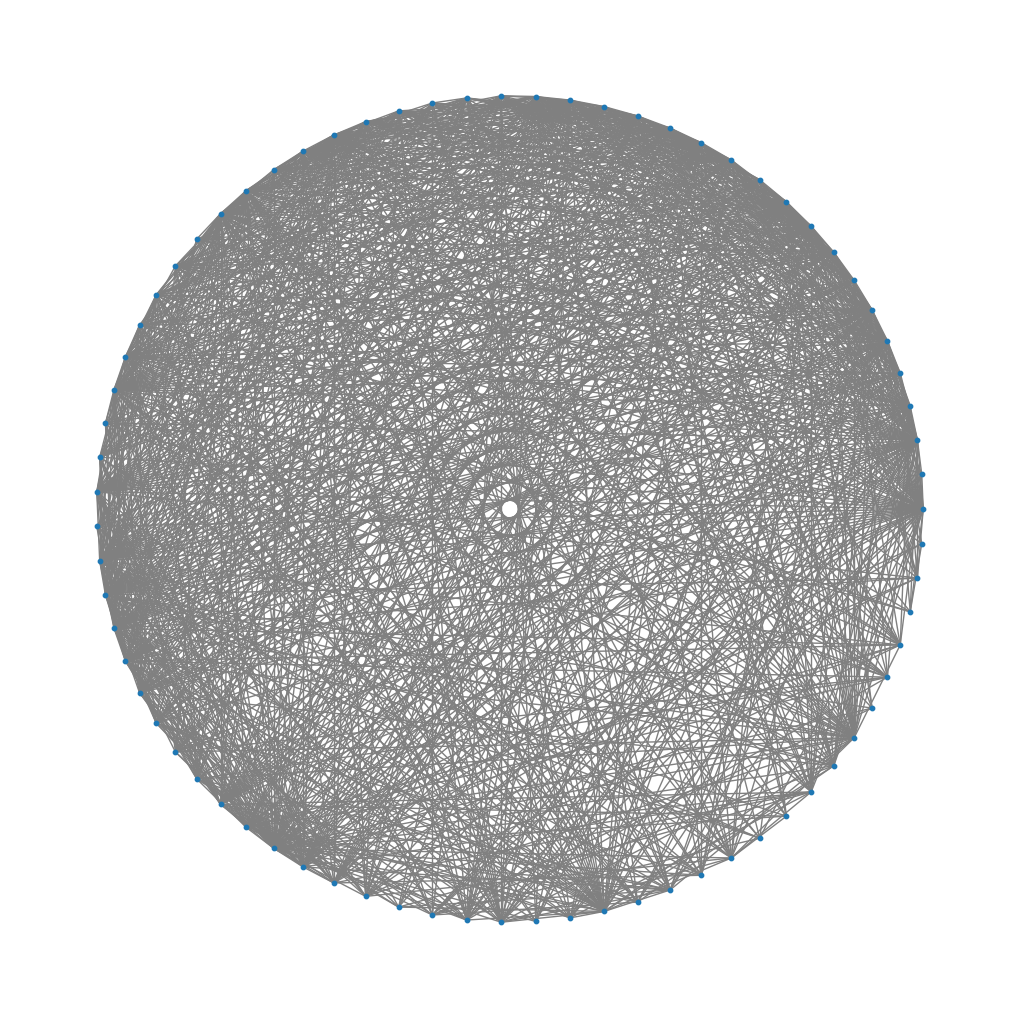

In [36]:
G1 = nx.read_edgelist(path = "hospital_edge-1.txt") #Ingests the graph from the hospital txt file 
plt.figure(figsize = (10,10)) #Creates the figure
nx.draw_circular(G1,with_labels = False, node_size =10, edge_color = "grey") #Adds the graph to the figure
plt.show() #Shows the figure 

## SIR Simulation 

Finding the finite difference method to calculate the evolution of the probability of infection

In [39]:
def SIR_Model(G, Beta):
    """

    """
    Time = 200
    Gamma = 0
    node_list = list(G1.nodes())
    n = G.number_of_nodes()
    x = np.zeros((n, Time))
    Initial_Infect = np.random.choice(range(n))
    x[Initial_Infect][0] = 1

    for t in range(Time-1):
        for index, value in enumerate(node_list):
            sum1 = 0
            for j in G1.neighbors(value):
                j =  [i for i in range(n) if node_list[i] == j][0]
                sum1 += x[j][t]
            x[index][t+1] =  x[index][t] + Beta/G.degree(node_list[index])*(1-x[index][t])*sum1 - Gamma*x[index][t]
    return x

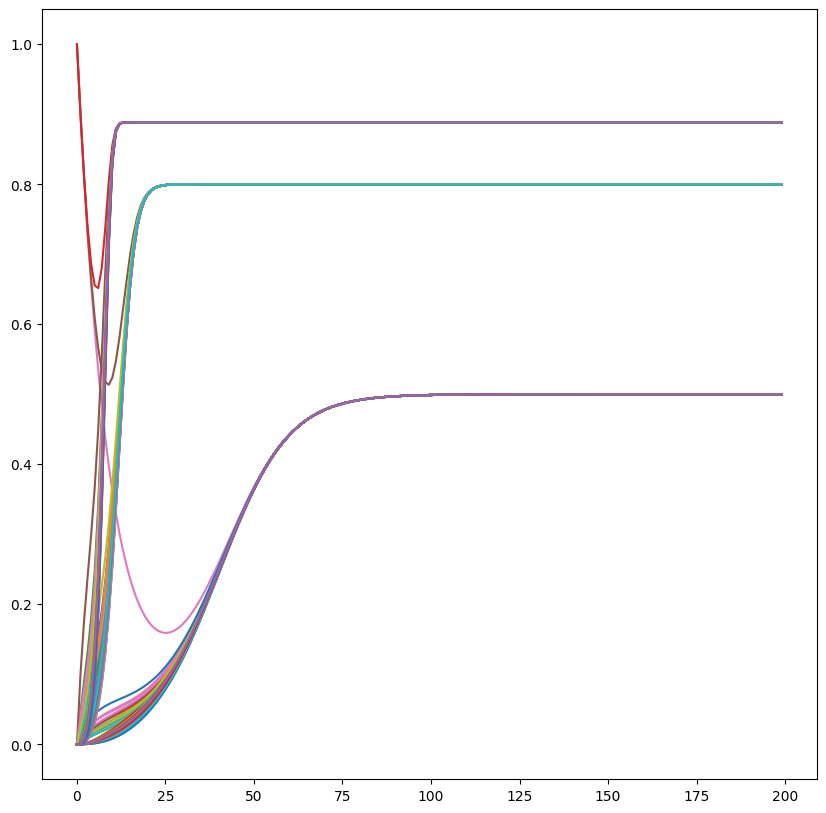

In [38]:
beta_list = [0.2,0.5,0.9] #Creates the list of beta values
plt.figure(figsize=(10, 10)) #Creates the initial figure
for i in beta_list: #Runs a for loop for each beta value
    res = SIR_Model(G1, i) #Runs the SIR model for each beta value
    for a in range(G1.number_of_nodes()): #Creates a range for plotting
        plt.plot(res[a]) #Plots the result of the SIR model 

## SI Simulation

In [30]:
def SI_Model(G):
    Beta = 0.1
    n = G.number_of_nodes()
    Avg = 1000
    Time=200
    node_list = list(G1.nodes())

    def neigh_met(G, node, beta):
      l = []
      for neig in list(G.neighbors(node)):
          rand = np.random.uniform(0,1)
          if rand < beta/len(list(G.neighbors(node))):
              l.append(neig)
      return l

    Y = np.zeros((n, Time))
    Initial_Infect = np.random.choice(range(n))
    for _ in range(Avg):   
      y = np.zeros((n, Time))       
      y[Initial_Infect][0] = 1
      for t in range(Time-1):
          for i in range(n):
              sum1 = 0
              for k in neigh_met(G, node_list[i], Beta):
                    j =  [i for i in range(n) if node_list[i] == k][0]
                    sum1 += y[j][t]*(1-y[i][t])
              y[i][t+1] = y[i][t] + sum1 
      Y = np.add(Y, y)
    return Y/Avg

In [31]:
res4 = SI_Model(G1) #Runs the SI model 


KeyboardInterrupt: 

In [22]:
print(res4)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


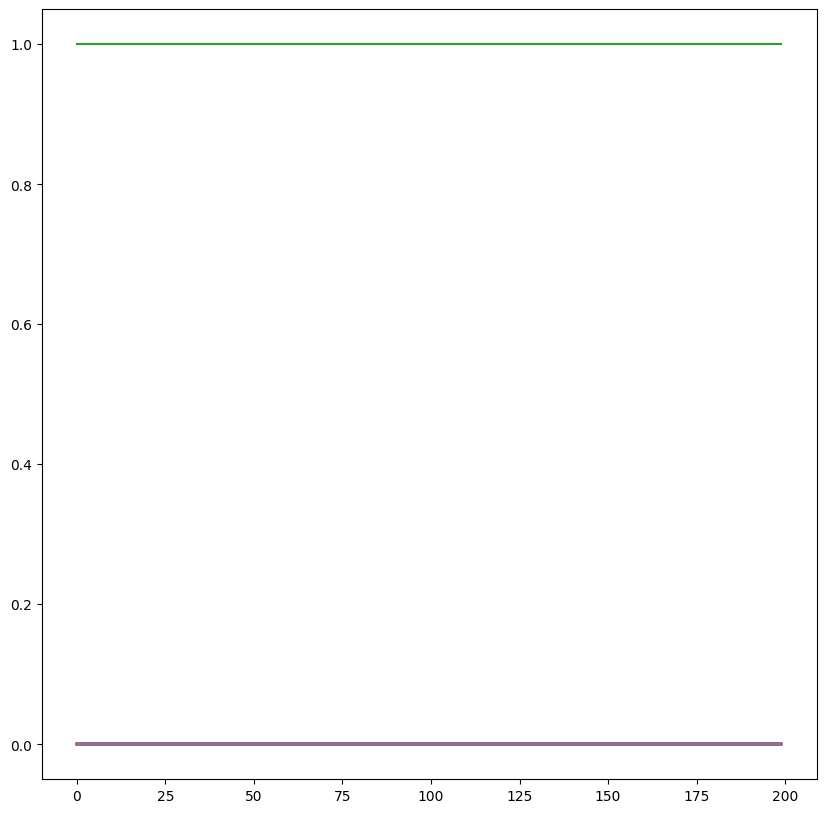

In [23]:
plt.figure(figsize=(10, 10)) #Creates the figure for plotting
for a in range(G1.number_of_nodes()): #Creates a range for plotting
        plt.plot(res4[a]) #Plots the results of the SI Model
plt.show() #Shows the SI Model results

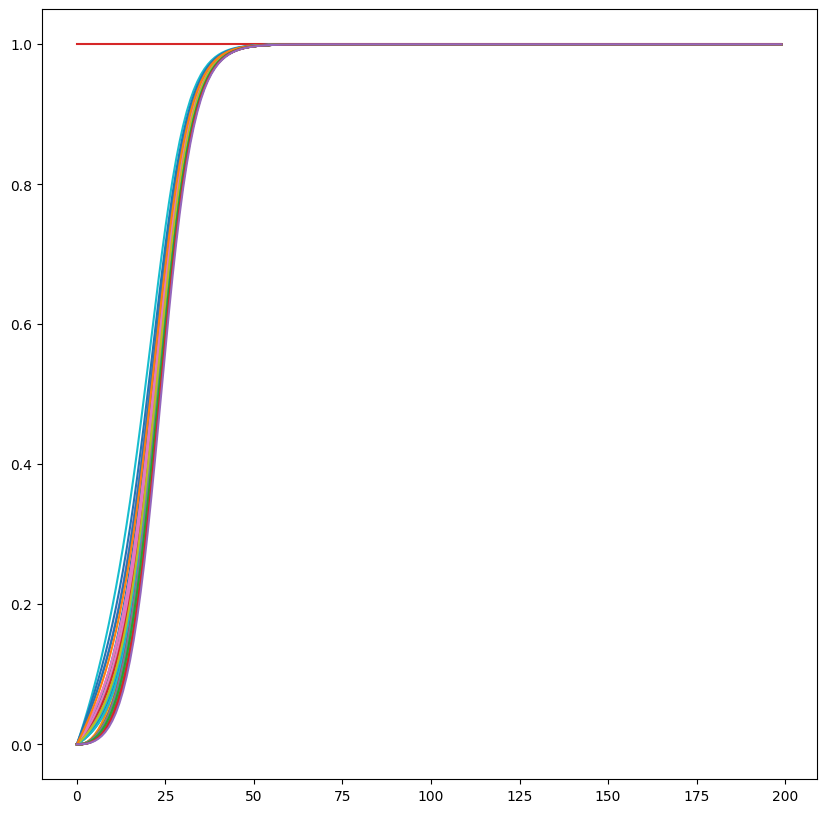

In [40]:
res5 = SIR_Model(G1, 0.2) #Modify SIR_Model to have Gamma equal to 0.0 for this one runtime and revert it back after generating this plot 
plt.figure(figsize=(10, 10)) #Creates the figure for plotting
for a in range(G1.number_of_nodes()): #Creates a range for plotting
        plt.plot(res5[a]) #Plots the results of the SI Model
plt.show() #Shows the SI Model results

# Question 2

Hengselmann-Krause bounded confidence model

## Ingesting the data

In [ ]:
G2 = nx.read_edgelist('rt-retweet.mtx')# Load data here
plt.figure(figsize = (10,10)) #Creates the figure 
nx.draw(G2, node_size = 200 , edge_color = "grey") #draw initial graph 
plt.show() #Shows the figure 

## Simulating the Confidence Model

In [ ]:
def HK(G,Tau, Time):
    """
    Description: Creates the Helgsemann-Krause in python. 

    Using the following formula:
        [INSERT FORMULA]

    Notes: 
        
    Args:
        G: undirected graph G
        Tau: float value ranging from 0.0 to 1.0
        Time: integer value for the number of epochs

    Output:
        x: list of values as time goes on according to the HK Model 
    """
    nodes = list(G.nodes) #Finds the node list of G
    n = G.number_of_nodes() #Finds the numeber of nodes in G from the node list 
    #Find max degree
    def d_alpha(G):
        """
        Description: Finds the alpha value for the graph (G) 

        Using the following formula:
            \alpha = 0.5/(max_i(di))

        Notes: 
            max_i: the maximum degree value in graph G

        Args:
            G: undirected graph G
            

        Output:
            alpha: alpha value for the graph 
        """
        MAX_DEG = max(d for _, d in G.degree()) #Gets the degrees of graph G and then picks the max
        alpha = 0.5 / MAX_DEG #Arthimatic for alpha
        return alpha

    def L_RW(G):
        """
        Description: Finds the random walk laplacian for the graph (G) 

        Using the following formula:
           [INSERT FORMULA]

        Args:
            G: undirected graph G
            n: number of nodes in graph G
        Output:
            L: the random walk laplacian matrix for graph G
        """
        L = np.zeros((n, n))
        for l in range(n):
            for m in range(n):
                if l == m:
                    L[l][m] = 1
                elif G.has_edge(nodes[l], nodes[m]) == True:
                    L[l][m] = -1/G.degree(nodes[l])
        return L 


    w = np.multiply((1-d_alpha(G)),np.identity(n)) - np.multiply(d_alpha(G),L_RW(G)) #Finds the mixing matrix 
    x = np.empty((n, Time)) #Creates an empty n x time matrix 
    x[:,0] = np.random.uniform(0, 1, n) #Creates an intial vector and puts it into the first column of x 


    #HK Confidence
    for t in range(1,Time):
        for i in range(n):
            sum1 = 0 #Sum for the numerator
            sum2 = 0 #Sum for the denominator
            x_i = x[i] [t-1] #Gets the previous state of x_i
            for j in range(n): 
                x_j = x[j][t-1] #Defines x_j similarly to x_i
                d_ij = np.abs(x_i - x_j) #Finds the absolute value of x_i and x_j
                u = 1 if d_ij <= Tau else 0 #U function 
                sum1 += w[i][j] * u * x_j #Adds to the numerator sum 
                sum2 += w[i][j] * u #Adds to the denominator sum 
            x[i][t]= (sum1 / sum2)
            
    plt.figure(figsize = (10,10)) #Creates the figure
    for k in range(len(list(G.nodes()))): #Range for the graph 
        plt.plot(x[k,:]) #Adds the plots to the figures 
    return(plt.show())

In [ ]:
HK(G2,0.1,1000) #With Tau value of 0.1

In [ ]:
HK(G2,0.5,2000) #With Tau value of 0.5

# Question 3 

Electric Grid Simulation 

## Ingesting the data

In [ ]:
import scipy.io
import pypower
mat = scipy.io.loadmat('ieee30.mat') #Imports the data
Bbus = mat['Bbus'] #Splits the data for Bbus
Ybus = mat['Ybus'] #Splits the data for Ybus
sinj = mat['sinj'] #Splits the data for sinj
vp = mat['vp'] #Splits the data for vp


## Apparent Power Generations

In [ ]:
i = Ybus @ vp #Caclulate i 
s =vp * np.conjugate(i) #calculates s as the product of vp and the conjugate of i

p= np.real([i for i in s[1:]]) #Finds p 

p[0] #Shows the first element in p

## DC Power Flow

### Calculate the active (real) power injections

### Compute Voltage Angles

In [ ]:
bus = Bbus[1:, 1:] #Gets rid of the first row and column of Bbus 
B_inv = np.linalg.inv(bus.todense()) #Inverts B 
thetas = B_inv.dot(p) #Finds Thetas
thetas #Shows thetas 

## Optimal Power Flow

See the rest of question three in the google colab 